# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [54]:
states = pd.read_csv("../data/states_edu.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [66]:
#We have two options for the NaN values in the enrollment.
#since we are training a machine learning model, we want real data. We will drop the na values.
print(states.isna().sum())
critical_cols = ['ENROLL','TOTAL_REVENUE','TOTAL_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']
states_clean = states.dropna(subset=critical_cols)
print(states_clean.shape)

states[['year', 'state']] = states['PRIMARY_KEY'].str.split("_", n=1, expand=True)
states.head()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
year                               0
state                              0
d

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,year,state
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1992,ALABAMA
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,1992,ALASKA
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1992,ARIZONA
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1992,ARKANSAS
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1992,CALIFORNIA


In [70]:
states.shape

(1715, 27)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 math*

How many years of data are logged in our dataset? 

In [38]:
# @@@ 1
# Your Code
print(states['YEAR'].unique())
#33 years of data.

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [80]:
# @@@ 2
subset = states.dropna(subset=['AVG_MATH_4_SCORE'])
avg_scores = subset.groupby('STATE')[col].mean()

mi_avg = avg_scores.loc['MICHIGAN']
oh_avg = avg_scores.loc['OHIO']

print("Michigan avg Grade 4 Math:", mi_avg)
print("Ohio avg Grade 4 Math:", oh_avg)

Michigan avg Grade 4 Math: 234.36363636363637
Ohio avg Grade 4 Math: 239.45454545454547


Find the average for your chosen test across all states in 2019

In [87]:
# @@@ 3
scores_2019 = states.loc[states['YEAR'] == 2019, 'AVG_MATH_4_SCORE']
scores_2019 = scores_2019.dropna()
avg_2019 = scores_2019.mean()

print("Average Grade 4 Math score across all states in 2019:", avg_2019)

Average Grade 4 Math score across all states in 2019: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [97]:
# @@@ 4
subset = states.dropna(subset=['AVG_MATH_4_SCORE'])

max_scores = subset.groupby('STATE')[col].max().reset_index()

max_scores = max_scores.rename(columns={col: 'Max_score'})
print(max_scores)

                   STATE  Max_score
0                ALABAMA      233.0
1                 ALASKA      237.0
2                ARIZONA      240.0
3               ARKANSAS      240.0
4             CALIFORNIA      235.0
5               COLORADO      247.0
6            CONNECTICUT      245.0
7               DELAWARE      243.0
8   DISTRICT_OF_COLUMBIA      235.0
9                  DODEA      250.0
10               FLORIDA      246.0
11               GEORGIA      240.0
12                HAWAII      243.0
13                 IDAHO      242.0
14              ILLINOIS      239.0
15               INDIANA      249.0
16                  IOWA      246.0
17                KANSAS      248.0
18              KENTUCKY      242.0
19             LOUISIANA      234.0
20                 MAINE      246.0
21              MARYLAND      247.0
22         MASSACHUSETTS      253.0
23              MICHIGAN      238.0
24             MINNESOTA      253.0
25           MISSISSIPPI      241.0
26              MISSOURI    

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [105]:
# @@@ 5
states['expenditure_per_student'] = states['TOTAL_EXPENDITURE'] / states['ENROLL']
states['support_per_student'] = states['SUPPORT_SERVICES_EXPENDITURE'] / states['ENROLL']
states['federal_share'] = states['FEDERAL_REVENUE'] / states['TOTAL_REVENUE']
states['elem_share'] = states['GRADES_1_8_G'] / states['ENROLL']


Feature engineering justification: **<First, the above comment suggestion about expenditure per student was a great idea, as money can contribute to resources. However, the total expenditure does not tell the whole story. This is why we need to make subcategories revolving around support per student as well as the federal share that is given to the schools. Finally, my observation of fourth grade should look at the proportion of elementary school students. It may be interesting and important to look at how the proportion of students of similar grade could effect each others abilities.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

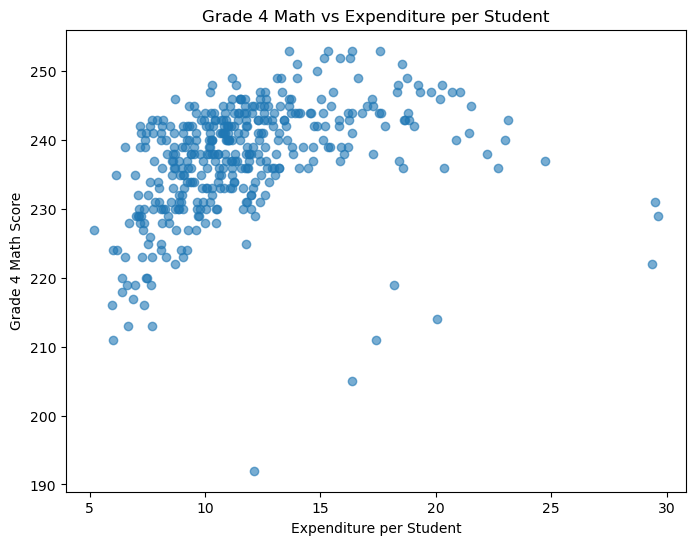

In [108]:
# @@@ 6
plt.figure(figsize=(8,6))
plt.scatter(states['expenditure_per_student'], states['AVG_MATH_4_SCORE'], alpha=0.6)
plt.xlabel("Expenditure per Student")
plt.ylabel("Grade 4 Math Score")
plt.title("Grade 4 Math vs Expenditure per Student")
plt.show()

**<CAPTION FOR VIZ 1>** Grade 4 math scores relation to the expenditure per student. There is a moderately strong and positive correlation between expenditure per student and Grade 4 math scores.

**Visualization 2**

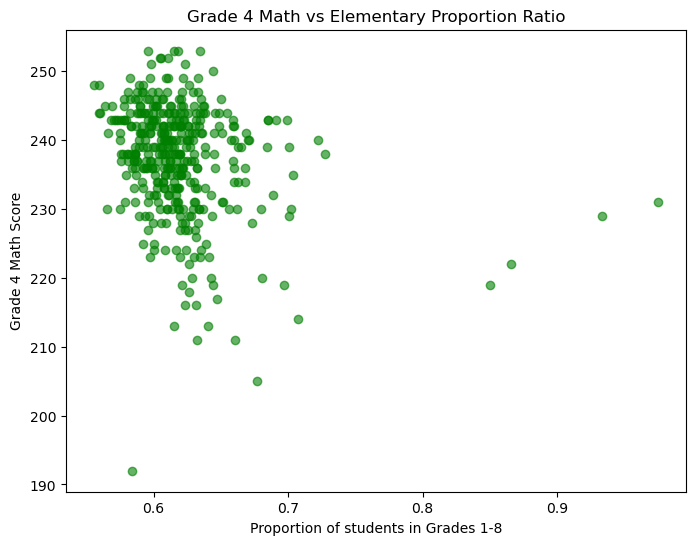

In [117]:
# @@@ 7
plt.figure(figsize=(8,6))
plt.scatter(states['elem_share'], states['AVG_MATH_4_SCORE'], alpha=0.6, color="green")
plt.xlabel("Proportion of students in Grades 1-8")
plt.ylabel("Grade 4 Math Score")
plt.title("Grade 4 Math vs Elementary Proportion Ratio")
plt.show()

**<CAPTION FOR VIZ 2>** Comparing the performance of students in Grade 4 math vs the proportion of students. There is little to no correlation between them, indicating that the amount of students per grade isn't a significant variable in determining what affects grade 4 math.


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [131]:
from sklearn.model_selection import train_test_split

In [197]:
# @@@ 8
X = states.drop(columns=['PRIMARY_KEY', 'state', 'STATE', 'YEAR', 'AVG_MATH_4_SCORE'])
y = states['AVG_MATH_4_SCORE']


# drop rows with missing target
mask = y.notna()
X = X[mask]
y = y[mask]
X = X.dropna()
y = y.loc[X.index]

In [199]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [201]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [203]:
# @@@ 11
# create your model here
model = LinearRegression()

In [205]:
model.fit(X_train, y_train)

LinearRegression()

In [210]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [207]:
# @@@ 12
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: 0.9119600913129324
MAE: 1.4309938470759218
RMSE: 1.8068162006864905


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

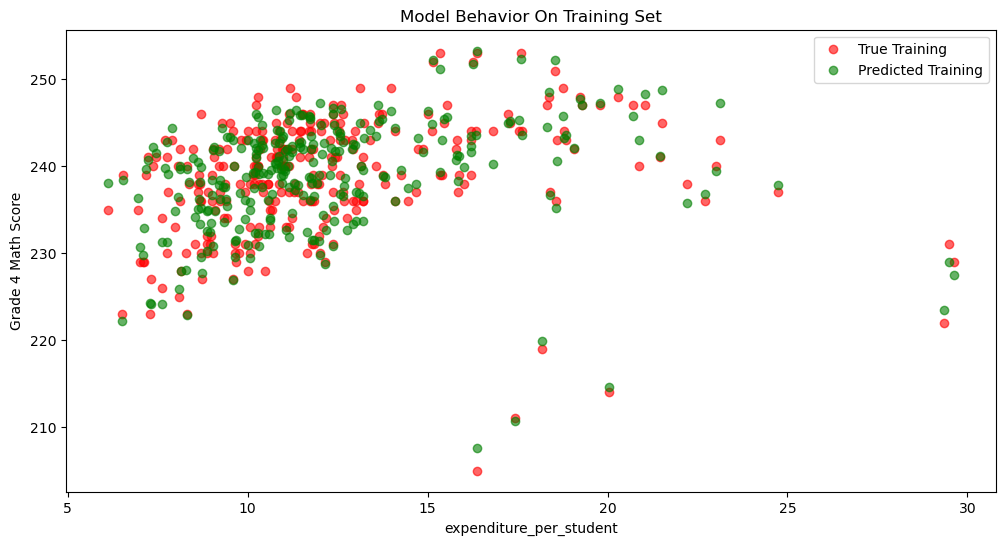

In [212]:
# @@@ 13

col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red", alpha=0.6)
plt.scatter(X_train[col_name], model.predict(X_train), color="green", alpha=0.6)

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Model Behavior On Training Set")
plt.show()


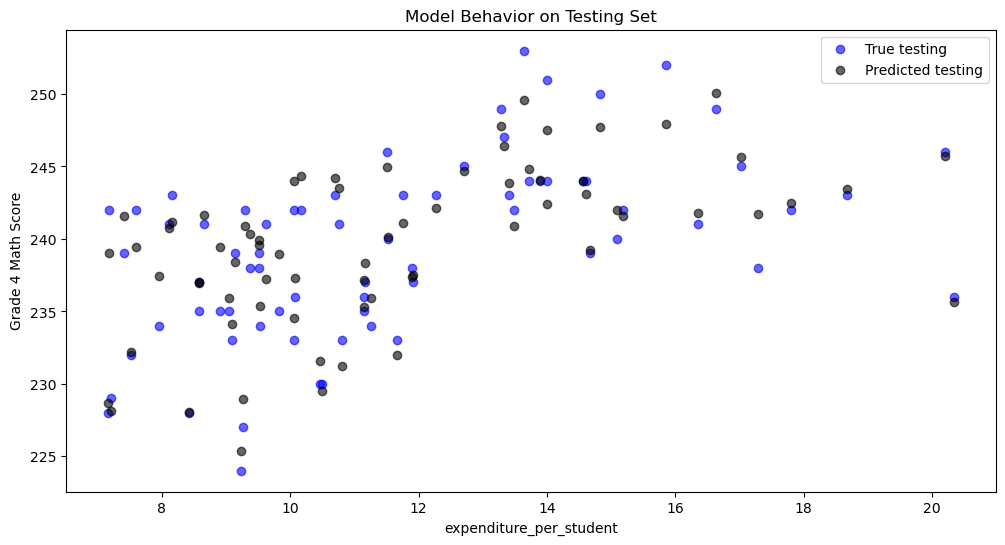

In [214]:
# @@@ 14

col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color="blue", alpha=0.6)
plt.scatter(X_test[col_name], model.predict(X_test), color="black", alpha=0.6)

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Model Behavior on Testing Set")
plt.show()
